In [76]:
from sympy import *


# 核心决策自变量
x, y, z = symbols('x y z')
# 区块链相关参数
M_1, M_2, P, S = symbols('M_1 M_2 P S')
C_1, C_2, C_3, C_4 = symbols('C_1 C_2 C_3 C_4')
R_1, R_2 = symbols('R_1 R_2')
# 医疗事故相关
L_1, L_2 = symbols('L_1 L_2')
H = symbols('H')
F, a_1, a_2 = symbols('F a_1 a_2')

In [77]:
# 定义矩阵元素
# 关于下标：前三位数字的0代表负向决策，最后一位数字123分别代表患者/医院/政府
F_1111 = P - a_1*(L_1) - M_1    # Mark
F_1112 = (S+R_1)-C_1 - a_1*(H+F)
F_1113 = R_2+a_1*F-C_3
F_0111 = - a_1*(L_2)
F_0112 = S-C_1 - a_1*(H+F)
F_0113 = a_1*F-C_3
F_1101 = P - a_1*(L_1) - M_1    # Mark
F_1102 = R_1-C_1 - a_1*(H+F)
F_1103 = a_1*F-C_4
F_0101 = - a_1*(L_2)
F_0102 = -C_1 - a_1*(H+F)
F_0103 = a_1*F-C_4

F_1011 = P - a_2*(L_1) - M_2    # Mark
F_1012 = R_1-C_2 - a_2*(H+F)
F_1013 = a_2*F-C_3
F_0011 = - a_2*(L_2)
F_0012 = -C_2 - a_2*(H+F)
F_0013 = a_2*F-C_3
F_1001 = P - a_2*(L_1) - M_2    # Mark
F_1002 = R_1-C_2 - a_2*(H+F)
F_1003 = a_2*F-C_4
F_0001 = - a_2*(L_2)
F_0002 = -C_2 - a_2*(H+F)
F_0003 = a_2*F-C_4

In [78]:
# 计算单独收益 - 患者
U_1 = z*y*F_1111\
    +z*(1-y)*F_1011\
    +y*(1-z)*F_1101\
    +(1-z)*(1-y)*F_1001
U_2 = z*y*F_0111\
    +z*(1-y)*F_0011\
    +y*(1-z)*F_0101\
    +(1-z)*(1-y)*F_0001
# 计算单独收益 - 医院
V_1 = z*x*F_1112\
    +z*(1-x)*F_0112\
    +x*(1-z)*F_1102\
    +(1-z)*(1-x)*F_0102
V_2 = z*x*F_1012\
    +z*(1-x)*F_0012\
    +x*(1-z)*F_1002\
    +(1-z)*(1-x)*F_0002
# 计算单独收益 - 政府
W_1 = y*x*F_1113\
    +y*(1-x)*F_0113\
    +x*(1-y)*F_1013\
    +(1-y)*(1-x)*F_0013
W_2 = y*x*F_1103\
    +y*(1-x)*F_0103\
    +x*(1-y)*F_1003\
    +(1-y)*(1-x)*F_0003

In [79]:
# 计算复制动态方程
F_x = factor(x*(1-x)*(U_1-U_2))
F_y = factor(y*(1-y)*(V_1-V_2))
F_z = factor(z*(1-z)*(W_1-W_2))

In [80]:
# 计算雅可比矩阵J的各维度元素
J_11 = factor(diff(F_x, x))
J_12 = factor(diff(F_x, y))
J_13 = factor(diff(F_x, z))

J_21 = factor(diff(F_y, x))
J_22 = factor(diff(F_y, y))
J_23 = factor(diff(F_y, z))

J_31 = factor(diff(F_z, x))
J_32 = factor(diff(F_z, y))
J_33 = factor(diff(F_z, z))

In [81]:
print("J_11:",J_11)
print("J_12:",J_12)
print("J_13:",J_13)

print("J_21:",J_21)
print("J_22:",J_22)
print("J_23:",J_23)

print("J_31:",J_31)
print("J_32:",J_32)
print("J_33:",J_33)

J_11: (2*x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)
J_12: x*(x - 1)*(L_1*a_1 - L_1*a_2 - L_2*a_1 + L_2*a_2 + M_1 - M_2)
J_13: 0
J_21: 0
J_22: -(2*y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z)
J_23: -S*y*(y - 1)
J_31: -R_2*y*z*(z - 1)
J_32: -R_2*x*z*(z - 1)
J_33: -(2*z - 1)*(-C_3 + C_4 + R_2*x*y)


In [82]:
# 使用 subs 方法替换 x, y, z 的值
xyz_dict = {x: 0, y: 0, z: 0}
J_11_subs = J_11.subs(xyz_dict)
J_22_subs = J_22.subs(xyz_dict)
J_33_subs = J_33.subs(xyz_dict)
# 计算表达式的值
result_J_11 = J_11_subs.evalf()
result_J_22 = J_22_subs.evalf()
result_J_33 = J_33_subs.evalf()
print("J_11:",result_J_11)
print("J_22:",result_J_22)
print("J_33:",result_J_33)

J_11: -L_1*a_2 + L_2*a_2 - M_2 + P
J_22: -C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2
J_33: -C_3 + C_4


In [33]:
print("F_x:",F_x)
print("F_y:",F_y)
print("F_z:",F_z)

F_x: x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)
F_y: -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z)
F_z: -z*(z - 1)*(-C_3 + C_4 + R_2*x*y)


In [2]:
def set_args(status_1, status_2, status_31, status_32):
    """
    参数设置函数
    """
    
    import warnings
    warnings.filterwarnings("ignore")
    from numpy import arange 
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.integrate import odeint
    
    # R_2 vs. C_3-C_4
    # ? vs. 14
    C_3 = 20
    C_4 = 6
    if   status_1 == 1:
        R_2 = 10
    elif status_1 == 2:
        R_2 = 18
    
    # (a_2-a_1)(H+F) vs. C_1-C_2 vs. (a_2-a_1)(H+F)+S
    # 18 vs. ? vs. 25
    a_1 = 0.03
    a_2 = 0.06
    H   = 100
    F   = 500
    S   = 7
    if   status_2 == 1:
        C_1 = 20
        C_2 = 5
    elif status_2 == 2:
        C_1 = 26
        C_2 = 5
    elif status_2 == 3:
        C_1 = 35
        C_2 = 5

    R_1 = 8

    # a_1(L_2-L_1)+P vs. M1
    # 10 vs. ?
    # a_2(L_2-L_1)+P vs. M2
    # 16 vs. ?
    P   = 4
    L_2 = 700
    L_1 = 500
    if status_31 == 1:
        M_1 = 3
    elif status_31 == 2:
        M_1 = 11
        
    if status_32 == 1:
        M_2 = 14
    elif status_32 == 2:
        M_2 = 19
    
    model_args = [R_2, C_3, C_4, a_1, a_2, H, F, S, C_1, C_2, R_1, P, L_2, L_1, M_1, M_2]
                 
    return model_args

In [3]:
def single_condition_diagram(condition, par_lt):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import random
    from scipy.integrate import odeint 
    from matplotlib import colors
    from numpy import arange 
    import numpy as np
    
    R_2 = par_lt[0]
    C_3 = par_lt[1]
    C_4 = par_lt[2]

    a_1 = par_lt[3]
    a_2 = par_lt[4]
    H   = par_lt[5]
    F   = par_lt[6]
    S   = par_lt[7]
    C_1 = par_lt[8]
    C_2 = par_lt[9]

    R_1 = par_lt[10]

    P   = par_lt[11]
    L_2 = par_lt[12]
    L_1 = par_lt[13]
    M_1 = par_lt[14]
    M_2 = par_lt[15]
    
    model_args = (P, M_1, M_2, L_1, L_2, a_1, a_2, R_1, R_2, S, C_1, C_2, C_3, C_4, H, F)
        
    def model(V, t, P, M_1, M_2, L_1, L_2, a_1, a_2, R_1, R_2, S, C_1, C_2, C_3, C_4, H, F):
        x, y, z = V.tolist()
        return np.array([(x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)),\
                -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z),\
                -z*(z - 1)*(-C_3 + C_4 + R_2*x*y)
                        ])
    
    plt.rcParams['axes.unicode_minus']=False
    plt.close("all") # 防止刷屏
    
    ''' 
        x/y/x-t diagram 
    '''
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    
    t = np.arange(0, 10, 0.01)
    for i in arange(0.1, 1, 0.2):
        for j in arange(0.1, 1, 0.2):
            for k in arange(0.1, 1, 0.2):
                xyz_init = [i,j,k]
                sol = odeint(model, xyz_init, t, model_args)
                ax1.plot(t, sol.T[0,:],c=plt.get_cmap('spring')(10), alpha=0.2)
                ax1.plot(t, sol.T[1,:],c=plt.get_cmap('winter')(200), alpha=0.4)
                ax1.plot(t, sol.T[2,:],c=plt.get_cmap('autumn')(20), alpha=0.2)
    ax1.legend(labels=('patient','hospital','goverment'))
    ax1.set_xlabel("t",labelpad=-5)
    ax1.set_ylabel("$x_0$/$y_0$/$z_0$",labelpad=-5)
    ax1.set_title(f"x/y/z-t diagram for condition-{condition}")

    
    ''' 
        phase diagram
    '''
    ax2 = fig.add_subplot(122, projection='3d')
    t = arange(1, 8, 0.02) 
    # color=["#C5E0B4","#FFE699","#FEB98A","#DAE3F3"]
    xyz_par_lt = []
    for i in [i for i in arange(0.1,1,0.1)]:
        for j in [i for i in arange(0.1,1,0.1)]:
                 for k in [i for i in arange(0.1,1,0.1)]:
                    xyz_par_lt.append([i,j,k])

    def model(V, t, P, M_1, M_2, L_1, L_2, a_1, a_2, R_1, R_2, S, C_1, C_2, C_3, C_4, H, F):
        x, y, z = V.tolist()
        return np.array([(x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)),\
                -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z),\
                -z*(z - 1)*(-C_3 + C_4 + R_2*x*y)
                        ])
    for xyz in xyz_par_lt:
        sol = odeint(model, xyz, t, model_args)
        X,Y,Z = sol.T[0,:],sol.T[1,:],sol.T[2,:]
        Zmax = np.array(Z).max()
        Zmin = np.array(Z).min()
        # 随z变化 划分线段 颜色深浅服从rainbow这个cm 并且用z分数索引color
        for i in range(len(Z) - 1):
            ax2.plot(X[i:i + 2], Y[i:i + 2], Z[i:i + 2],'go-',
                    color = plt.cm.rainbow(int(i / 400 * 255 + 50)),
                    zdir = "z",marker=",",linewidth = 1, alpha = i/400*0.7 + 0.2)
            
    # from https://blog.csdn.net/weixin_43257735/article/details/121831188
    def add_right_cax(ax, pad, width):
        '''
        在一个ax右边追加与之等高的cax.
        pad是cax与ax的间距.
        width是cax的宽度.
        '''
        axpos = ax.get_position()
        caxpos = mpl.transforms.Bbox.from_extents(
            axpos.x1 + pad,
            axpos.y0 + 0.1,
            axpos.x1 + pad + width,
            axpos.y1 - 0.1
        )
        cax = ax.figure.add_axes(caxpos)

        return cax
    
    # colorbar使用线性的Normalize.
    norm1 = mpl.colors.Normalize(vmin=0, vmax=8)
    im1 = mpl.cm.ScalarMappable(norm=norm1, cmap="rainbow")
    cax = add_right_cax(ax2, pad=0.03, width=0.02)
    cbar1 = fig.colorbar(
        im1, cax=cax,
        label='colorbar with Normalize for time'
    )
    ax2.view_init(elev = 20, azim = -50)
    ax2.set_xlabel(r"$x$",labelpad = 0)
    ax2.set_ylabel(r"$y$",labelpad = 0)
    ax2.set_zlabel(r"$z$",labelpad = 0)
    ax2.set_facecolor('w')
    ax2.legend()
    ax2.set_title(f"phase diagram for condition-{condition}")
    plt.savefig(f'condition_plot-{condition}.jpg', dpi=300)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


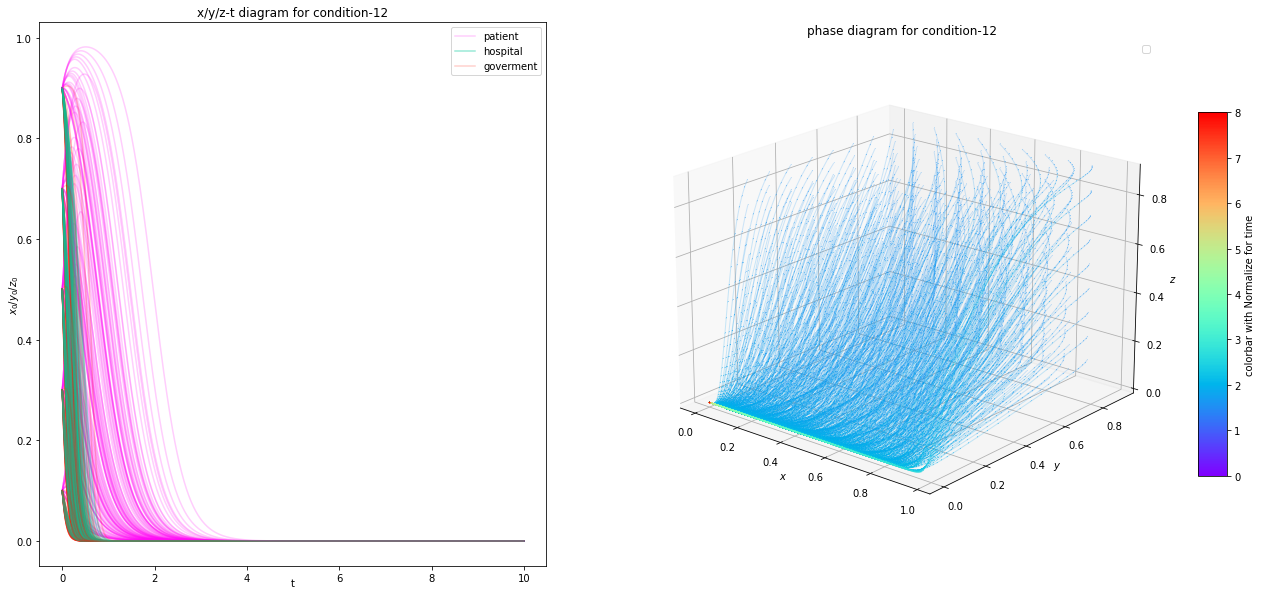

In [4]:
# 第二个参数rainbow结果
# 情境1
single_condition_diagram(condition=1, par_lt=set_args(1,1,1,1))
# 情境2
single_condition_diagram(condition=2, par_lt=set_args(1,1,2,1))
# 情境3
single_condition_diagram(condition=3, par_lt=set_args(1,2,1,1))
# 情境4
single_condition_diagram(condition=4, par_lt=set_args(1,2,1,2))

# 情境5
single_condition_diagram(condition=5, par_lt=set_args(2,1,1,1))
# 情境6
single_condition_diagram(condition=6, par_lt=set_args(2,1,2,1))

# 情境7
single_condition_diagram(condition=7, par_lt=set_args(2,2,1,1))
# 情境8
single_condition_diagram(condition=8, par_lt=set_args(2,2,1,2))
# 情境9
single_condition_diagram(condition=9, par_lt=set_args(2,2,2,1))
# 情境10
single_condition_diagram(condition=10, par_lt=set_args(2,2,2,2))

# 情境11
single_condition_diagram(condition=11, par_lt=set_args(2,3,1,1))
# 情境12
single_condition_diagram(condition=12, par_lt=set_args(2,3,1,2))

No handles with labels found to put in legend.


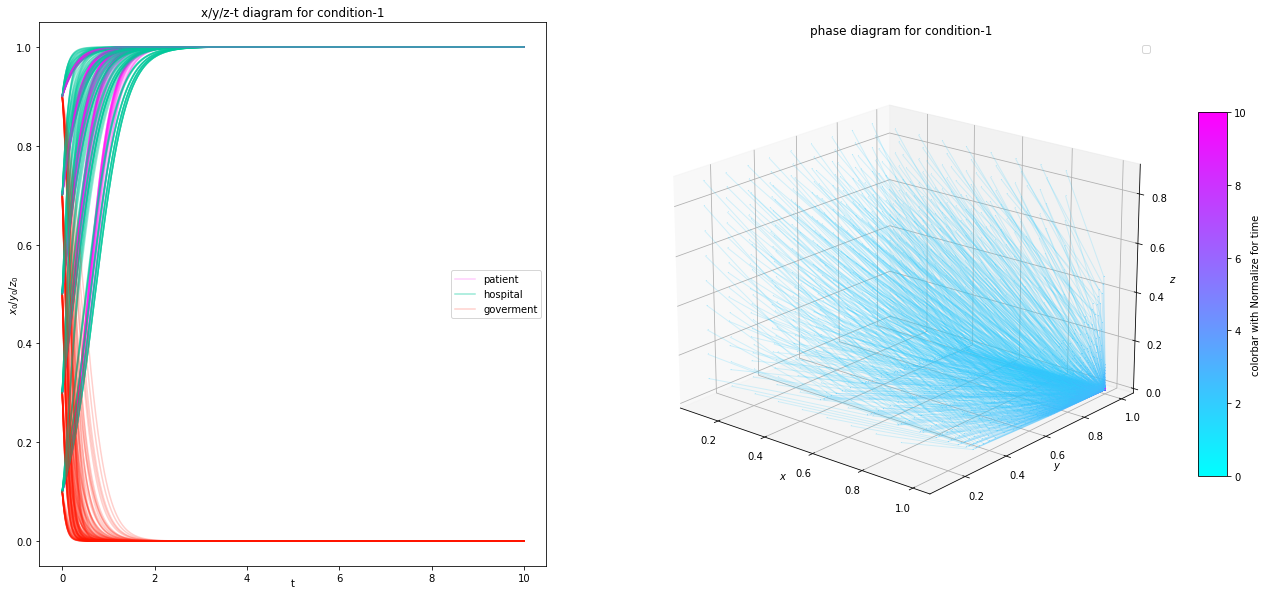

No handles with labels found to put in legend.


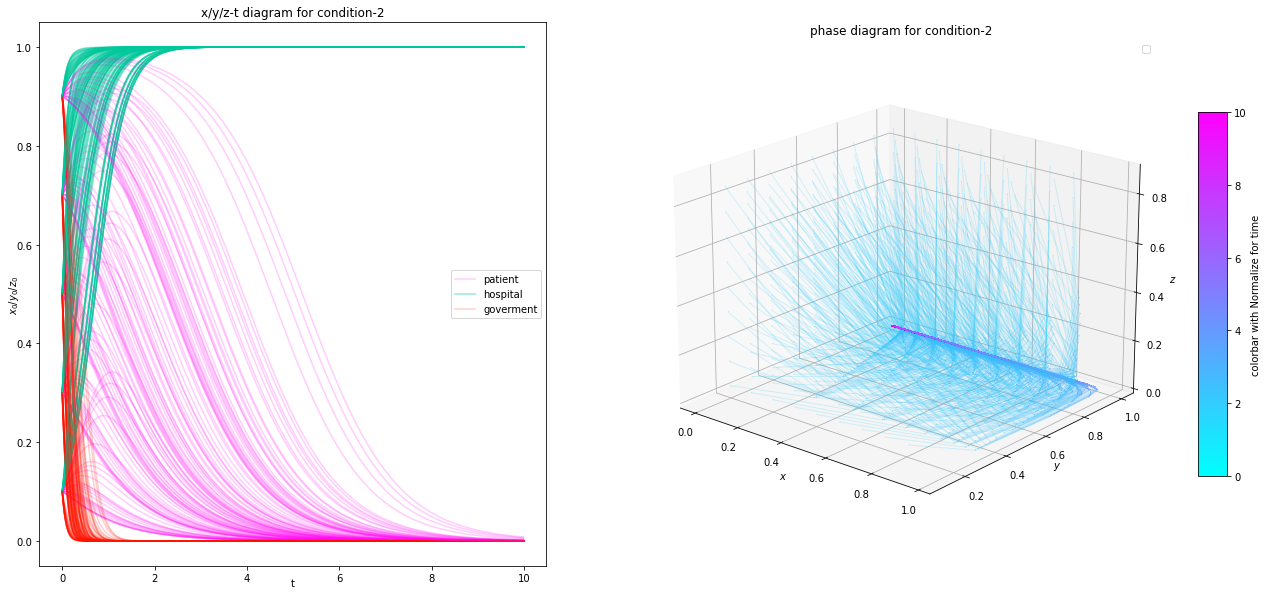

No handles with labels found to put in legend.


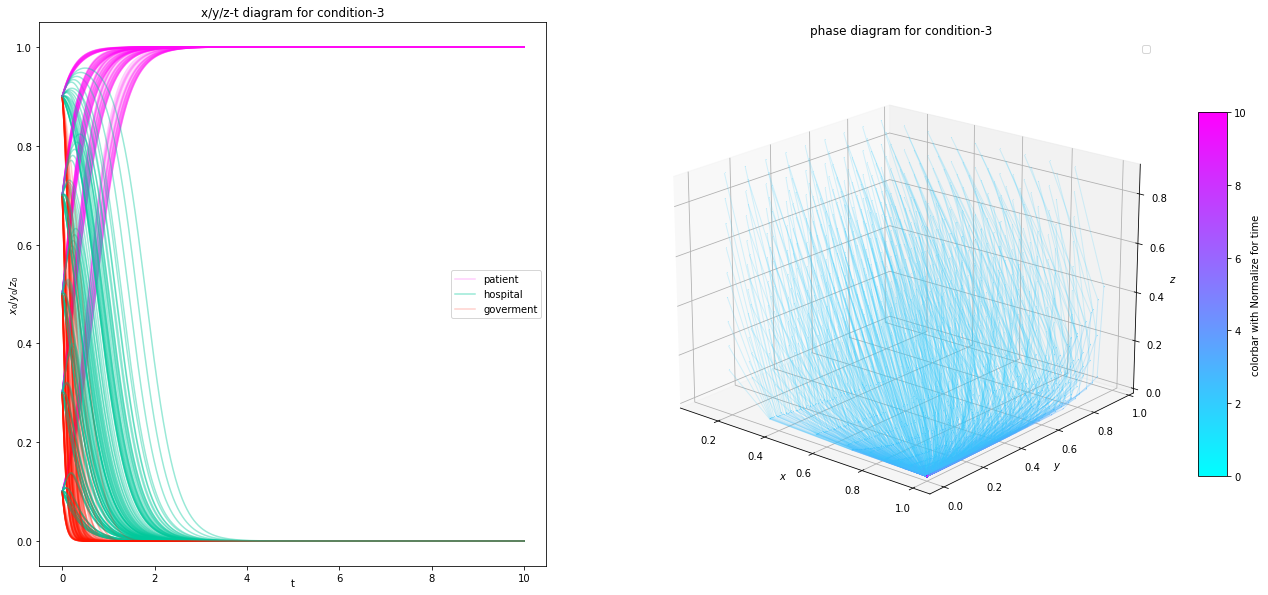

No handles with labels found to put in legend.


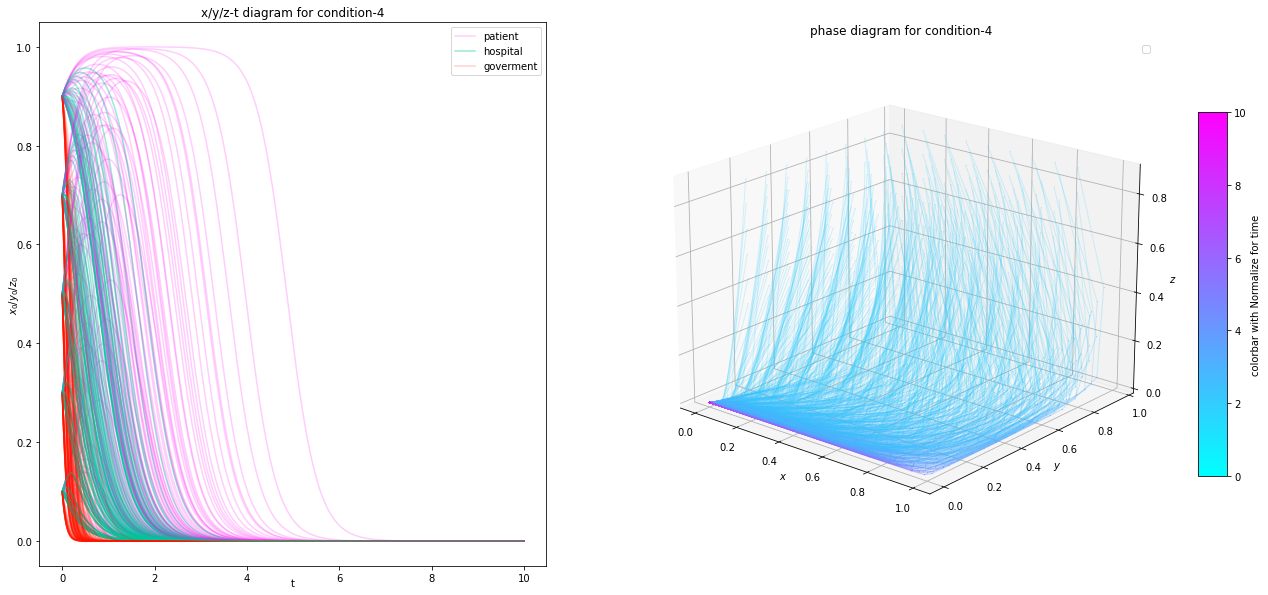

No handles with labels found to put in legend.


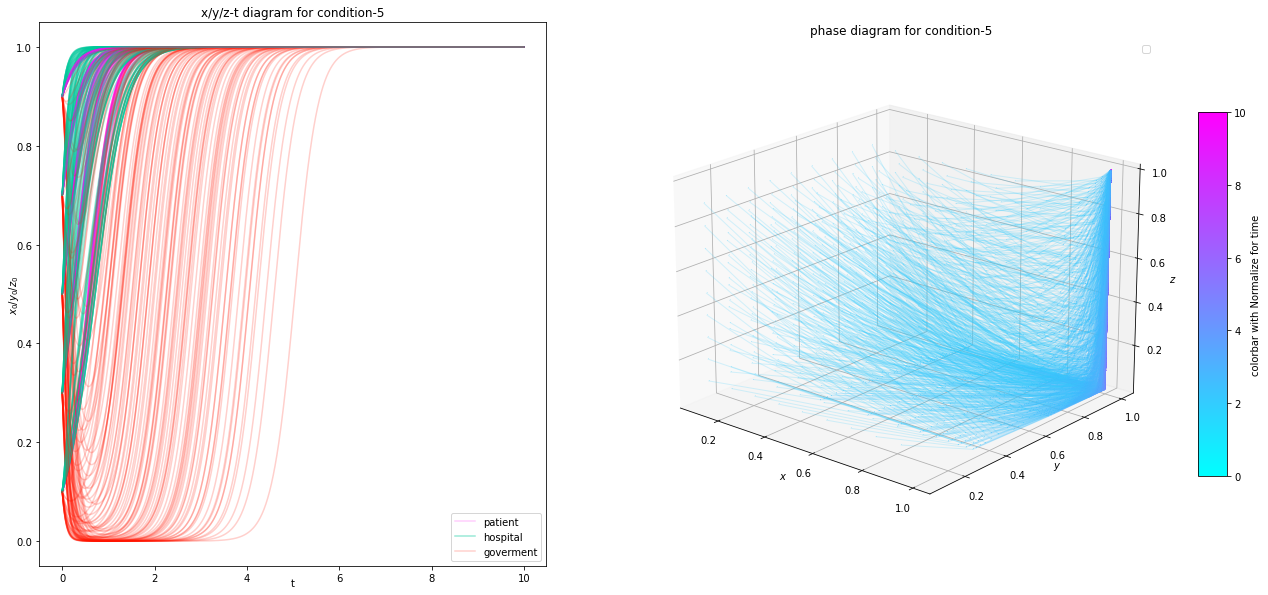

No handles with labels found to put in legend.


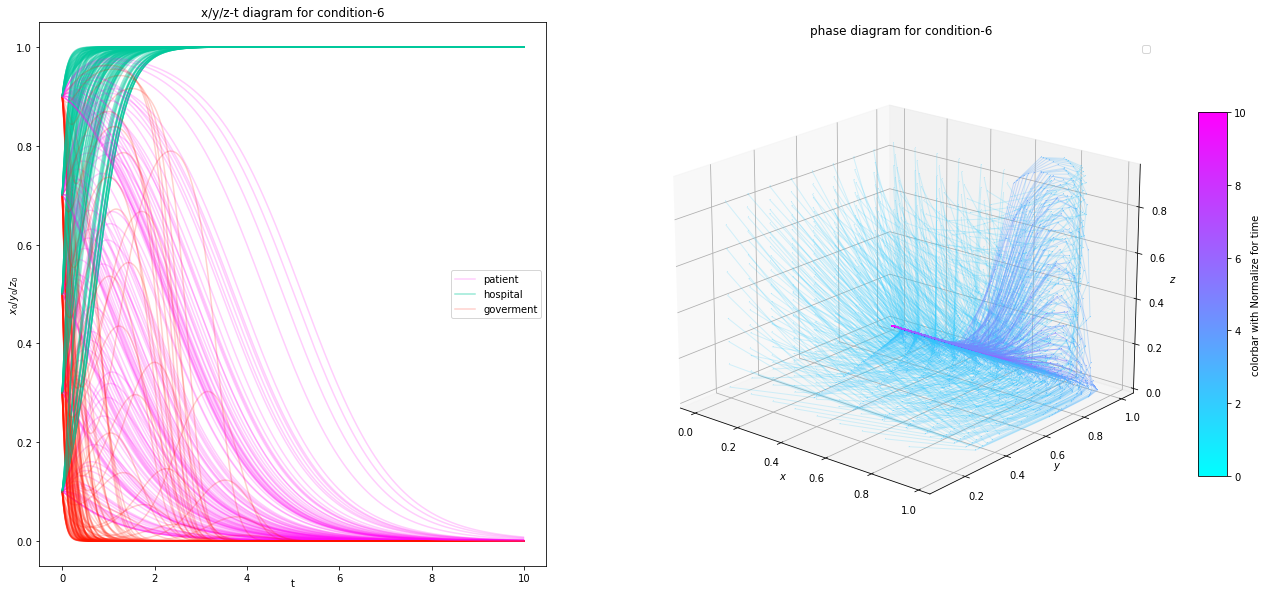

No handles with labels found to put in legend.


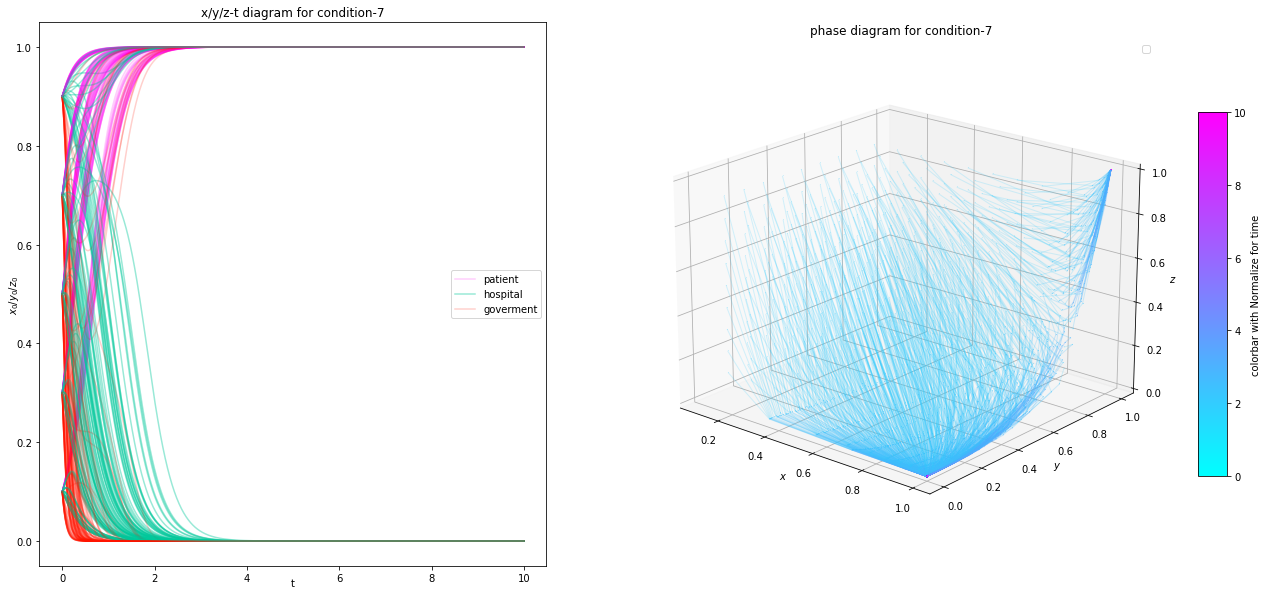

No handles with labels found to put in legend.


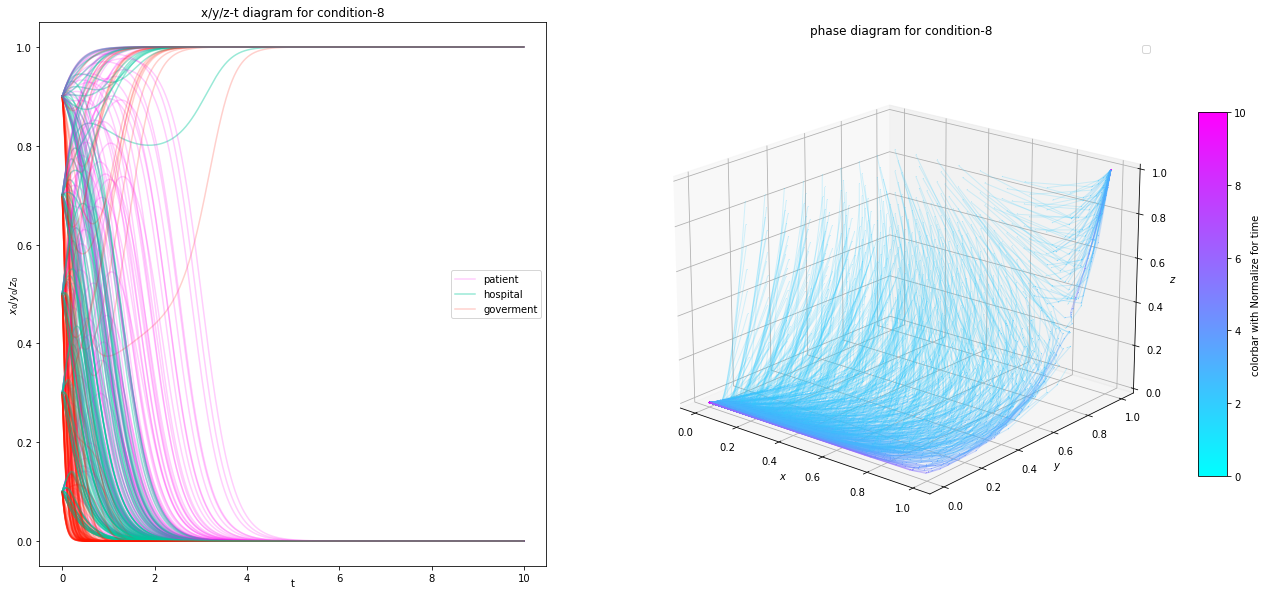

No handles with labels found to put in legend.


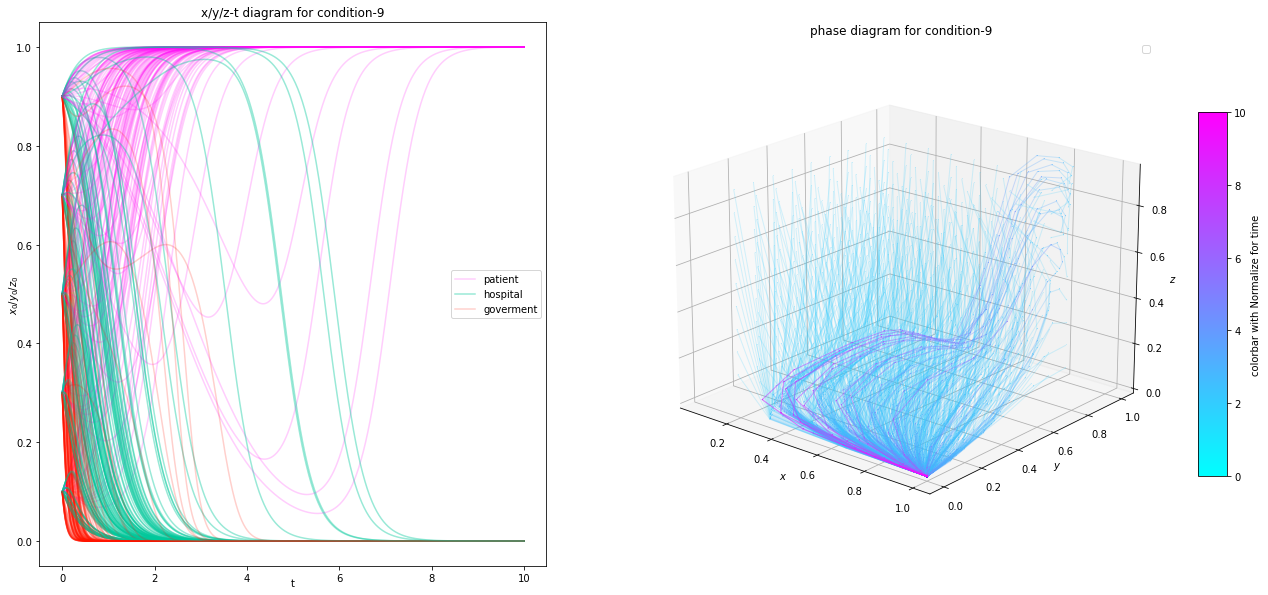

No handles with labels found to put in legend.


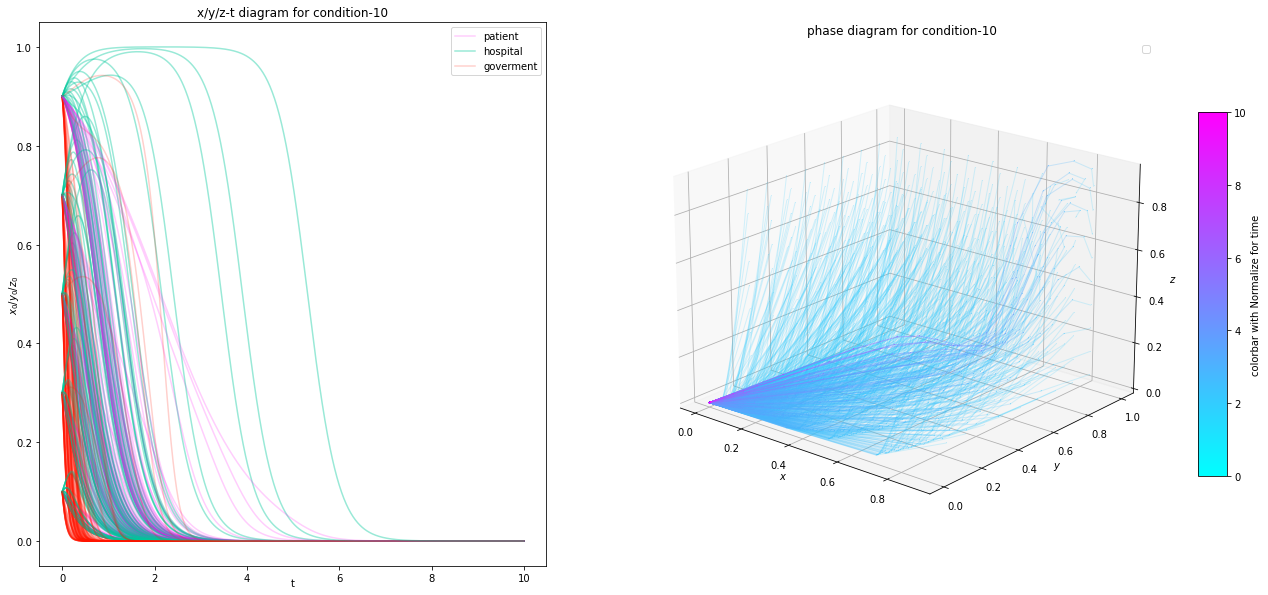

No handles with labels found to put in legend.


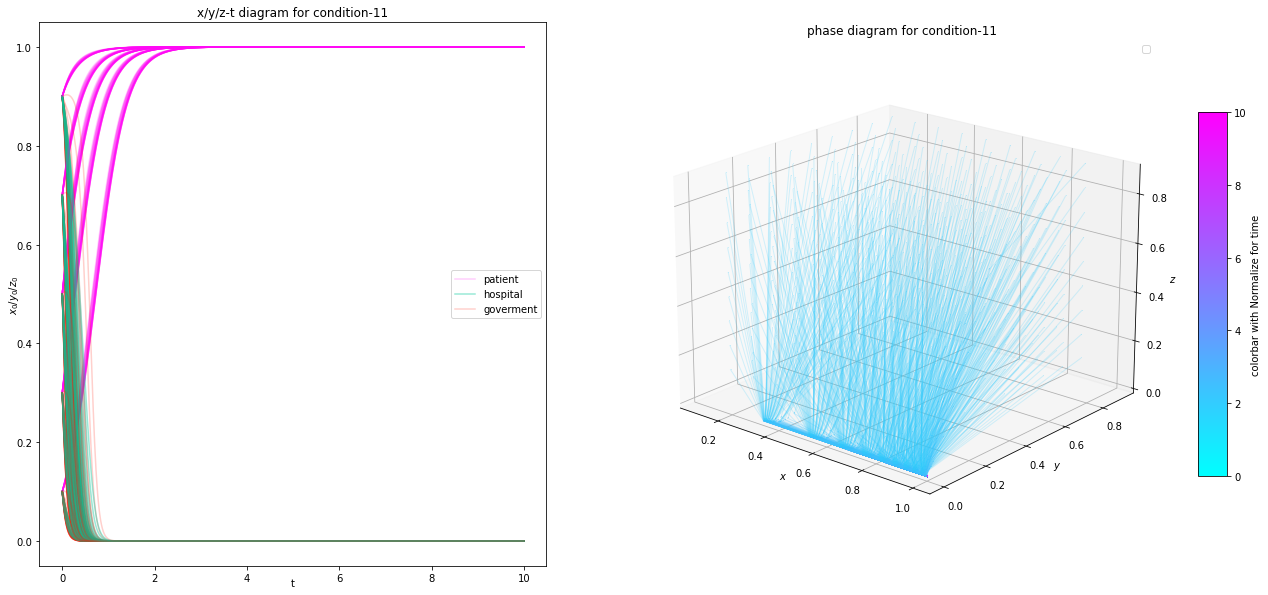

No handles with labels found to put in legend.


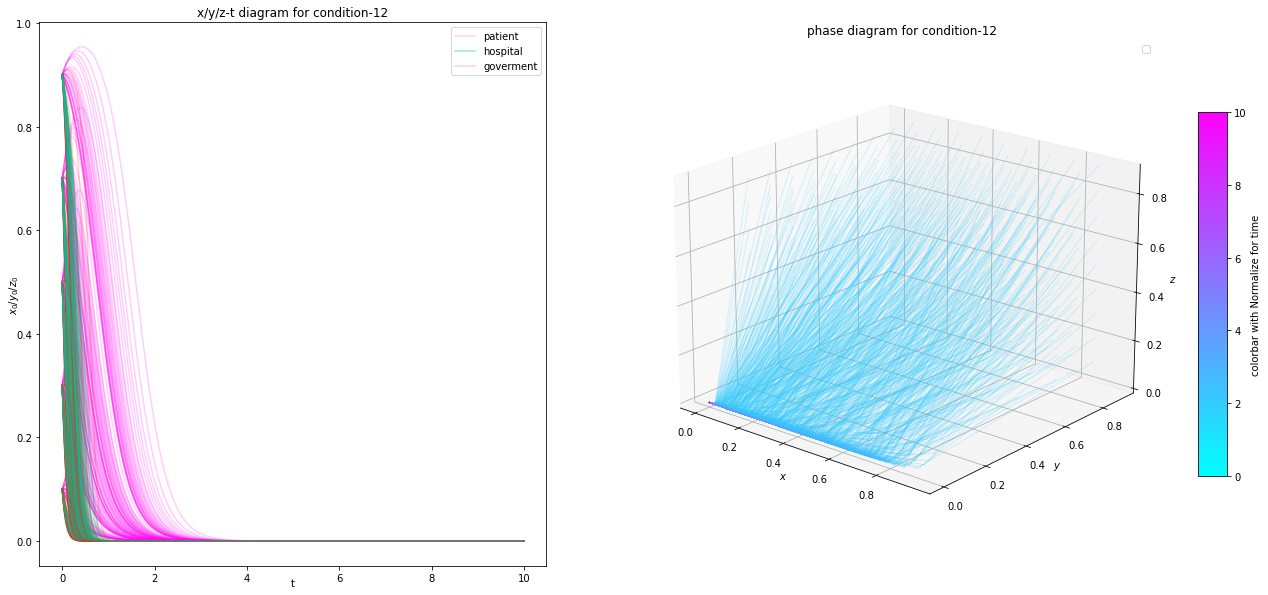

In [36]:
# 原始参数cool结果